In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data.data , data.target , test_size = 0.33)  

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
N , D = X_train.shape

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [19]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [20]:
r = model.fit(X_train , y_train , validation_data = (X_test , y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1786 - accuracy: 0.2625 - val_loss: 1.1114 - val_accuracy: 0.2926
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.3386 - val_loss: 1.0150 - val_accuracy: 0.3457
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9851 - accuracy: 0.3780 - val_loss: 0.9287 - val_accuracy: 0.3617
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9003 - accuracy: 0.4304 - val_loss: 0.8509 - val_accuracy: 0.4255
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8252 - accuracy: 0.4751 - val_loss: 0.7803 - val_accuracy: 0.4787
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7566 - accuracy: 0.5407 - val_loss: 0.7183 - val_accuracy: 0.5266
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5984 - val_loss: 0.6647 - val_accuracy: 0.6064
Epoch 8/100


In [21]:
print("Train Score" , model.evaluate(X_train , y_train))
print("Test Score" , model.evaluate(X_test , y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9790
Train Score [0.10402912646532059, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9681
Test Score [0.11960125714540482, 0.9680851101875305]


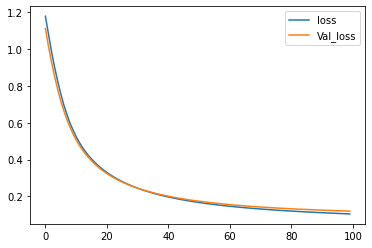

In [22]:
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'Val_loss')
plt.legend()    